In [2]:
import numpy as np 
import pandas as pd

In [3]:
diabetes_df = pd.read_csv("diabetes.csv")
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
from sklearn.linear_model import Ridge, LinearRegression, Lasso, LogisticRegression
from sklearn.model_selection import KFold, train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, root_mean_squared_error, roc_curve, roc_auc_score

X = diabetes_df.drop(["Outcome"], axis=1).values
y = diabetes_df['Outcome'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=69)

X_train.shape, y_train.shape, X_test.shape, y_test.shape


((537, 8), (537,), (231, 8), (231,))

In [5]:
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
r_squard = reg.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
print(r_squard)
print("mse: " + str(mse) + "\nrmse: " + str(rmse))

0.3046721986545401
mse: 0.16006834039331402
rmse: 0.4000854163716968


In [6]:
alphas = [0.0001, 0.1, 1, 10, 100]
scores = []
for alpha in alphas:
    # Ridge is used to prevent overfitting 
    reg = Ridge(alpha = alpha) # shrinks coefficients towards zero while keeping all features
    reg.fit(X_train, y_train)
    score = reg.score(X_test, y_test)
    scores.append(score)
print(scores)

[0.3046721717759914, 0.30464535716466046, 0.30440708054714505, 0.3023133696328062, 0.29359436413074225]


In [7]:
#Lasso is also used for overfitting
reg = Lasso(alpha=.2)  # Shrinking coefficients to 0, removing irrelavant features (diff from Ridge)
reg.fit(X_train, y_train)
socre = reg.score(X_test, y_test)
print(score)

0.29359436413074225


In [8]:
# is used for classification (yes/no), linear is used to actually model
reg = LogisticRegression(max_iter=1000) # max_iter increase the number of iterations so the moderl could converge or find the optimal solution
reg.fit(X_train,y_train)
y_pred_prob = reg.predict_proba(X_test)[:, 1]

In [9]:
kf = KFold(n_splits=6, shuffle=True, random_state=69)
cv_scores = cross_val_score(reg, X, y, cv=kf) # corss value score is when there are multiple r_squared calcualted to reduce bias on data split
print("Corss Values Scores: " + str(cv_scores))
print("Mean: " + str(np.mean(cv_scores)))
print("Std: " + str(np.std(cv_scores)))
print("CI: " + str(np.quantile(cv_scores, [.025, .975])))

Corss Values Scores: [0.8046875 0.7265625 0.7421875 0.7890625 0.828125  0.75     ]
Mean: 0.7734375
Std: 0.03636520844731495
CI: [0.72851562 0.82519531]


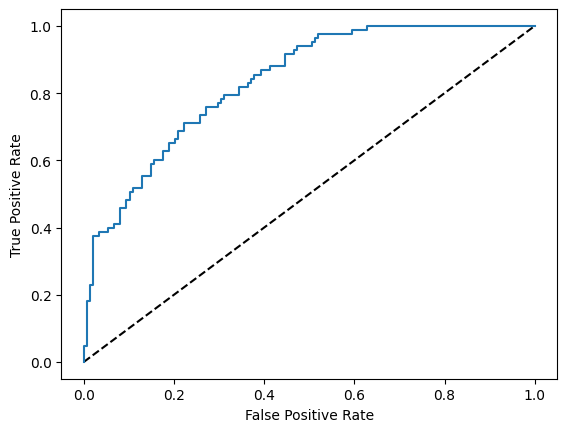

In [10]:
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot([0, 1], [0, 1], "k--")
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()  

#Precision - is when false positive is too expensive
#Recall - is when false negative is too expensive

In [11]:
auc = roc_auc_score(y_test, y_pred_prob) #remember that y_test always comes first
print(auc) #niceee, pretty high i think -> 83.4-50 = 33.4% better than random

0.8343373493975903


In [12]:
from sklearn.preprocessing import StandardScaler # standard scaler subtracts by mean and divides by variance
from sklearn.impute import SimpleImputer 

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

reg = LogisticRegression(max_iter = 1000)

reg.fit(X_train_scaled, y_train)
y_pred = reg.predict(X_test_scaled)

score = reg.score(X_test_scaled, y_test)
cv_scores = cross_val_score(reg, X, y, cv=kf) 
print(np.mean(cv_scores))

0.7734375


In [13]:
print(diabetes_df.isna().sum().sort_values())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
